# Exploring Kākāpō similarity on the Z chromosome
Here we are examining the similarity of Z-chromosomes between a small subset of females and males they have mated with. Some of these males have demonstrated evidence of early embryo death and/or infertility. This is mildly challenging given that the sex chromosomes, by definition, are heterogametic in one sex (females). Therefore estimating runs of homozygosity (ROH) and other inbreeding estimates are not applicable to females. 

Looking to the Kākāpō125+ SNP dataset, we exclued all heterozygous sites genotyped our female(s) of interest as they are likely errors and challenging to correctly genotype. We then examine allelic diversity at these variable sites relative to males with whom this female has mated. 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
data = {
    'Position': [100, 200, 300, 100, 200, 300, 100, 200, 300],
    'Sample': ['S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3'],
    'Genotype': ['0/0', '0/1', '1/1', '0/1', '0/0', '0/0', '1/1', '1/1', '1/1']
}

df = pd.DataFrame(data)

In [16]:
# Function to count the number of different alleles per allele
def count_different_alleles_per_allele(df, specific_sample_id):
    # Get the genotype of the specific sample
    sample_genotypes = df[df['Sample'] == specific_sample_id][['Position', 'Genotype']]
    
    # Merge the DataFrame with itself to compare each sample with the specific sample
    merged = df.merge(sample_genotypes, on='Position', suffixes=('', '_specific'))
    
    # Split genotypes into individual alleles for comparison
    def count_different_alleles(genotype, specific_genotype):
        alleles = genotype.split('/')  # Split alleles in format "X/Y"
        specific_alleles = specific_genotype.split('/')
        
        # Compare each allele separately
        diff_count = sum([1 for a, sa in zip(alleles, specific_alleles) if a != sa])
        return diff_count
    
    # Apply the function to count different alleles
    merged['DifferentAlleleCount'] = merged.apply(
        lambda row: count_different_alleles(row['Genotype'], row['Genotype_specific']), axis=1
    )
    
    # Filter out the rows where the sample ID matches the specific sample (to avoid comparing with itself)
    result = merged[merged['Sample'] != specific_sample_id]
    
    return result[['Position', 'Sample', 'DifferentAlleleCount']]

In [17]:
# Example usage
specific_sample_id = 'S1'
allele_differences = count_different_alleles_per_allele(df, specific_sample_id)

# Plotting function
def plot_allele_differences(allele_differences):
    plt.figure(figsize=(10, 6))

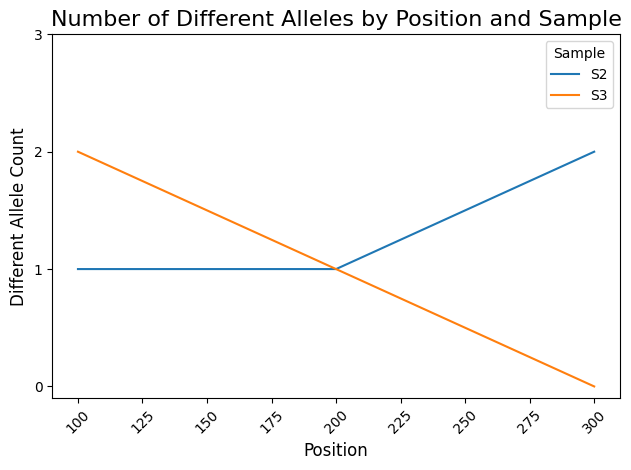

<Figure size 1000x600 with 0 Axes>

In [18]:
# Create a lineplot using seaborn
sns.lineplot(data=allele_differences, x='Position', y='DifferentAlleleCount', hue='Sample')
    
max_diff = int(allele_differences['DifferentAlleleCount'].max())
# Customize the plot
plt.title('Number of Different Alleles by Position and Sample', fontsize=16)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Different Allele Count', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(range(0, max_diff + 2))
plt.legend(title='Sample')
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

# Call the plotting function
plot_allele_differences(allele_differences)